In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings('ignore')

In [18]:
iris = load_iris()
X = iris.data
y = iris.target

In [19]:
gmm = GaussianMixture(n_components=3, random_state=42)  # 3 clusters for Iris dataset
gmm.fit(X)

# Step 3: Predict cluster labels
cluster_labels = gmm.predict(X)

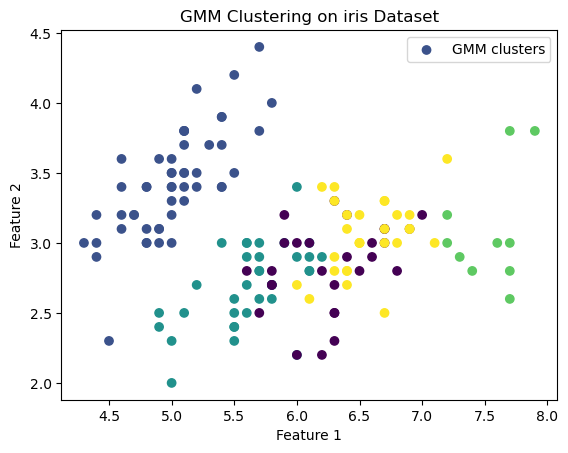

Cluster Centers (Means):
 [[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.428      1.462      0.246     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]]
Actual Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicted Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [20]:
plt.Figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=cluster_label,cmap='viridis', label='GMM clusters')
plt.title('GMM Clustering on iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
print("Cluster Centers (Means):\n", gmm.means_)
print("Actual Labels:\n", y)
print("Predicted Labels:\n", cluster_labels)

### Model After Model Tuning USing Hyperparameters.

In [21]:
para_grid = {
    'n_components': [2,3,4,5],
    'covariance_type': ['full','diag'],
    'tol': [1e-3, 1e-4],
    'max_iter': [100,200]
}

best_model = None
best_bic = float('inf')

for para in ParameterGrid(para_grid):
    gmm = GaussianMixture(**para, random_state=42)
    gmm.fit(X)
    bic = gmm.bic(X)
    if bic < best_bic:
        best_bic = bic
        best_model = gmm

print(f"Best Parameter:",  best_model.get_params())
print(f'Best BIC', best_bic)

Best Parameter: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 100, 'means_init': None, 'n_components': 2, 'n_init': 1, 'precisions_init': None, 'random_state': 42, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
Best BIC 574.0178327207459


In [22]:
probalilities = best_model.predict_proba(X)

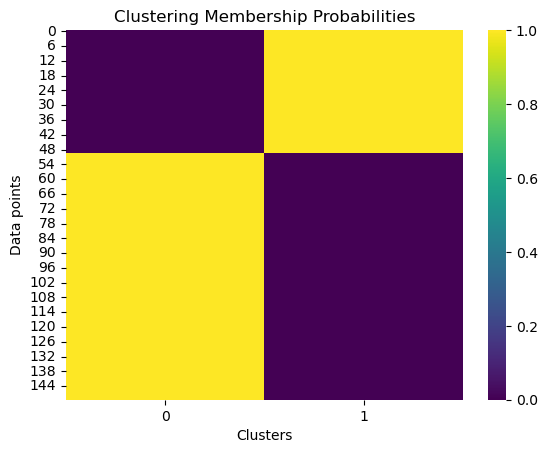

In [23]:
plt.Figure(figsize=(10,6))
sns.heatmap(probalilities, cmap='viridis', cbar=True)
plt.title('Clustering Membership Probabilities')
plt.xlabel('Clusters')
plt.ylabel('Data points')
plt.show()